# Imports

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants

In [2]:
BASE_PATH = '/kaggle/input/key-images/'

# Step1: Extracting Object (Key) from the image

In [3]:
# Read image
img = cv2.imread(f'{BASE_PATH}1a.jpeg')

# Adjust brightness and contrast
alpha = 1.0 # Simple contrast control
beta = 50 # Simple brightness control
new_image = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

hh, ww = new_image.shape[:2]

# threshold on white
# Define lower and uppper limits
lower = np.array([200, 200, 200])
upper = np.array([255, 255, 255])

# Create mask to only select black
thresh = cv2.inRange(new_image, lower, upper)

# apply morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# invert morp image
mask = 255 - morph

# apply mask to image
result = cv2.bitwise_and(img, img, mask=mask)

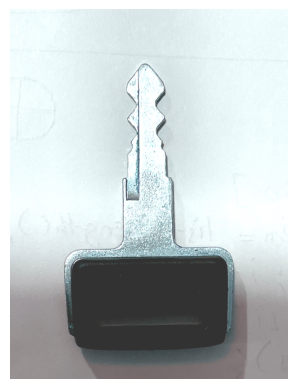

In [4]:
plt.imshow(new_image)
plt.axis('off')
plt.show()

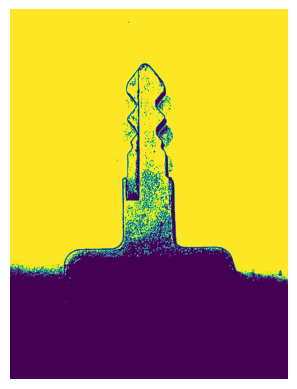

In [5]:
plt.imshow(thresh)
plt.axis('off')
plt.show()

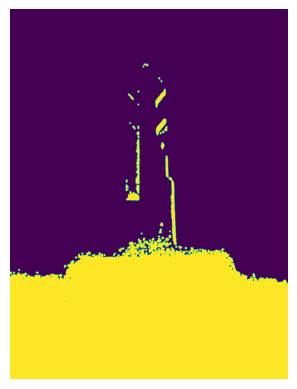

In [6]:
plt.imshow(mask)
plt.axis('off')
plt.show()